In [ ]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

In [ ]:
!pip install transformers requests beautifulsoup4 pandas numpy

In [3]:
from transformers import AutoTokenizer,AutoModelForSequenceClassification
import torch
import requests
from bs4 import BeautifulSoup
import re

In [4]:
# instantiate MOdel

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")

model = AutoModelForSequenceClassification.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")

In [6]:
# Encode and calculate sentiment

In [7]:
tokens = tokenizer.encode("I loved this, absolutely the best", return_tensors='pt')

In [9]:
result = model(tokens)

In [10]:
#returns values from 0-4 since it give the index of array
# argmax - useful when you need to determine the position of the highest value in a tensor, which is common in tasks like finding the predicted class in classification
# problems based on output scores.
torch.argmax(result.logits)

tensor(4)

In [11]:
# coverting it to int to make the rating between 1-5 since it initially return 0-4
int(torch.argmax(result.logits))+1

5

In [12]:
# Collect reviews for Tai Chi, Rochester from Yelp

In [13]:
r = requests.get("https://www.yelp.com/biz/tai-chi-bubble-tea-rochester-2?osq=Tai+Chi+Boba#reviews")

In [16]:
soup = BeautifulSoup(r.text, 'html.parser')

In [18]:
regex = re.compile('.*comment.*')

In [19]:
results = soup.find_all('p', {'class':regex})

In [20]:
reviews = [result.text for result in results]

In [ ]:
# Load Reviews into Dataframe and score

In [21]:
import numpy as np
import pandas as pd


In [22]:
df = pd.DataFrame(np.array(reviews), columns=['review'])

In [27]:
def sentiment_score(review):
  tokens = tokenizer.encode(review, return_tensors='pt')
  result = model(tokens)
  return int(torch.argmax(result.logits))+1

In [28]:
df['sentiment'] = df['review'].apply(lambda x: sentiment_score(x [:512]))

In [30]:
# Final output gives a number rating from 1-5 to each of the reviews based on worst to best
df

,review,sentiment
0,"Okay place for boba. I came here on Sunday, wa...",3
1,BOBA TIME. I forgot to review this ages ago bu...,5
2,I are here for the first time and loved it! Ba...,1
3,I loved the poke and milk tea the first time I...,3
4,I was craving Thai milk tea & this hit the spo...,5
5,I've been going to Taichi Bubble Tea for 6+ ye...,2
6,I ordered from here twice while I was visiting...,5
7,This is an updated review for the location at ...,4
8,This is for the Ridge Culver location. I'm not...,4
9,Highly recommend! The sushi burrito is amazing...,5


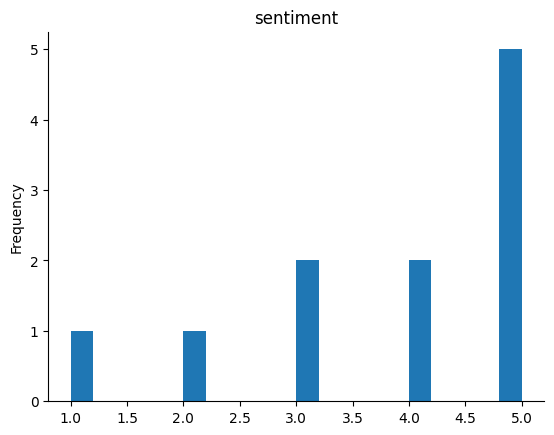

In [31]:
# @title sentiment

from matplotlib import pyplot as plt
df['sentiment'].plot(kind='hist', bins=20, title='sentiment')
plt.gca().spines[['top', 'right',]].set_visible(False)